In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data_full = pd.read_csv("kc_house_data.csv")

In [3]:
data = data_full.sample(n=21000, random_state=279)

In [4]:
data.head(5)

id             date     price  bedrooms  bathrooms  \
21435  1438000360  20140603T000000  494995.0         5       2.75   
15081  7935000595  20141008T000000  939000.0         3       3.50   
14866  7936800150  20140702T000000  394500.0         4       2.50   
16463  2695600190  20150327T000000  416000.0         2       1.00   
1468   3034200058  20140529T000000  400000.0         4       1.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21435         2670      3800     2.0           0     0  ...      8   
15081         2450      9248     2.0           0     4  ...      8   
14866         3002      6042     2.0           0     0  ...      8   
16463          940      4264     1.0           0     0  ...      7   
1468          1390      7200     1.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21435        2670              0      2014             0    98059  47.4783   
15081        1960            490      1933          1993    98136  47.5476   
14866        3002              0      2004             0    98055  47.4231   
16463         940              0      1949             0    98126  47.5314   
1468         1140            250      1965             0    98133  47.7224   

          long  sqft_living15  sqft_lot15  
21435 -122.123           2670        3800  
15081 -122.397           2620       10207  
14866 -122.186           2566        6390  
16463 -122.378           1630        4472  
1468  -122.332           1630        7702  

[5 rows x 21 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 21435 to 16885
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21000 non-null  int64  
 1   date           21000 non-null  object 
 2   price          21000 non-null  float64
 3   bedrooms       21000 non-null  int64  
 4   bathrooms      21000 non-null  float64
 5   sqft_living    21000 non-null  int64  
 6   sqft_lot       21000 non-null  int64  
 7   floors         21000 non-null  float64
 8   waterfront     21000 non-null  int64  
 9   view           21000 non-null  int64  
 10  condition      21000 non-null  int64  
 11  grade          21000 non-null  int64  
 12  sqft_above     21000 non-null  int64  
 13  sqft_basement  21000 non-null  int64  
 14  yr_built       21000 non-null  int64  
 15  yr_renovated   21000 non-null  int64  
 16  zipcode        21000 non-null  int64  
 17  lat            21000 non-null  float64
 18  lo

In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(15, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(df.corr(), annot=True, cmap=colormap)


In [8]:
def plot_count_bedrooms(data):
    plt.figure(figsize=(8, 6))
    data['bedrooms'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title('Count of Houses by Number of Bedrooms')
    plt.xlabel('Number of Bedrooms')
    plt.ylabel('Count')
    plt.show()

In [9]:

def plot_relationship_basement_size(data):
    plt.figure(figsize=(8, 6))
    sns.regplot(x='sqft_basement', y='price', data=data, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title('Relationship between Basement Size and Price')
    plt.xlabel('Basement Size (sqft)')
    plt.ylabel('Price')
    plt.show()

In [10]:
def plot_relationship_grade(data):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='grade', y='price', data=data)
    plt.title('Relationship between Grade and Price')
    plt.xlabel('Grade')
    plt.ylabel('Price')
    plt.show()

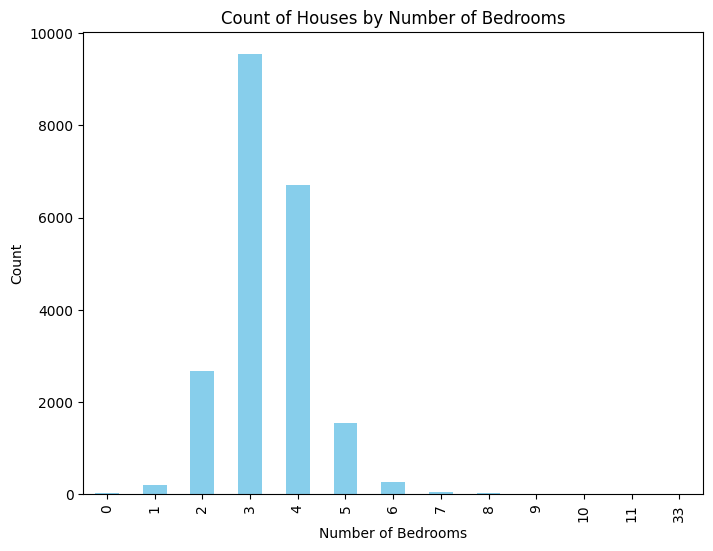

In [11]:
plot_count_bedrooms(data)

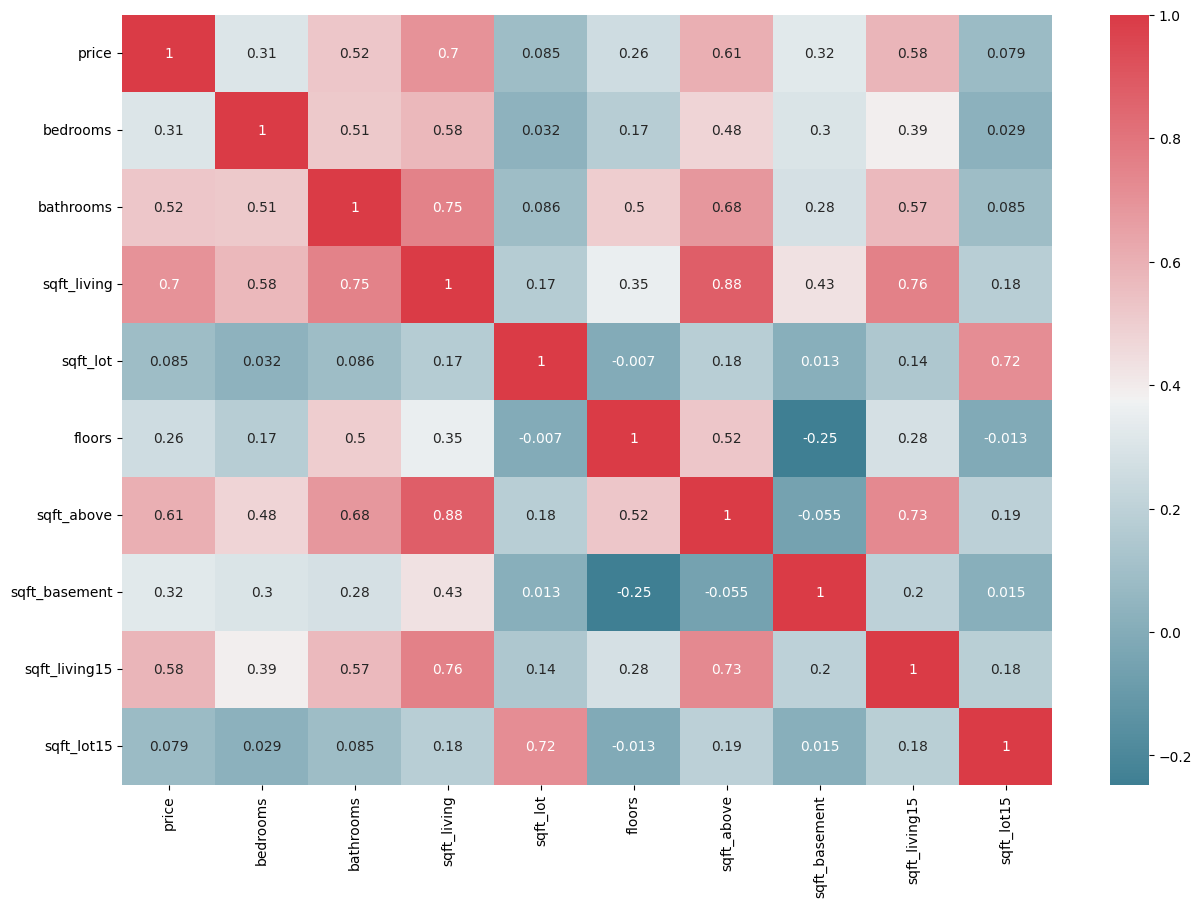

In [12]:
selected_data = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                       'floors', 'sqft_above', 'sqft_basement', 'sqft_living15',
                       'sqft_lot15']]
correlation_heatmap(selected_data)

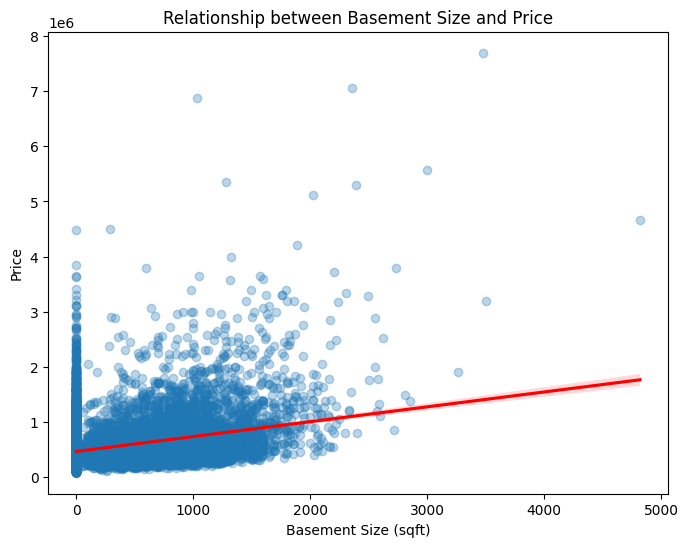

In [13]:
plot_relationship_basement_size(data)

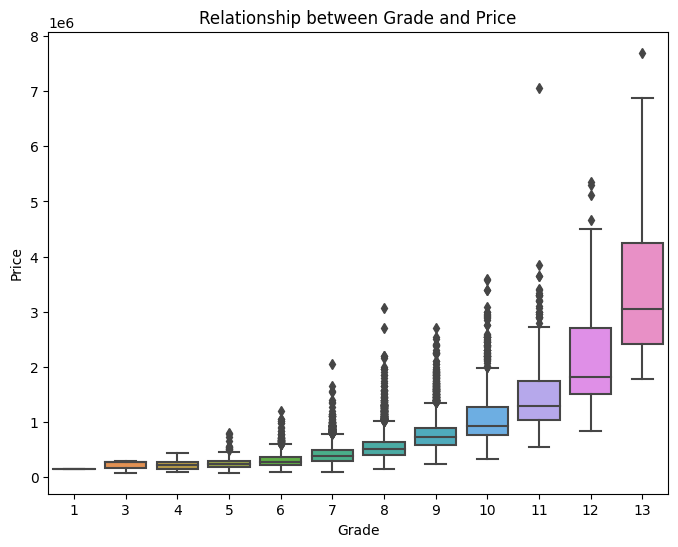

In [14]:
plot_relationship_grade(data)

In [15]:
def plot_relationship_basement_size(data):
    plt.figure(figsize=(8, 6))
    sns.regplot(x='sqft_basement', y='price', data=data, scatter_kws={'alpha': 0.3}, line_kws={'color': 'green'})
    plt.title('Relationship between Basement Size and Price')
    plt.xlabel('Basement Size (sqft)')
    plt.ylabel('Price')
    plt.show()

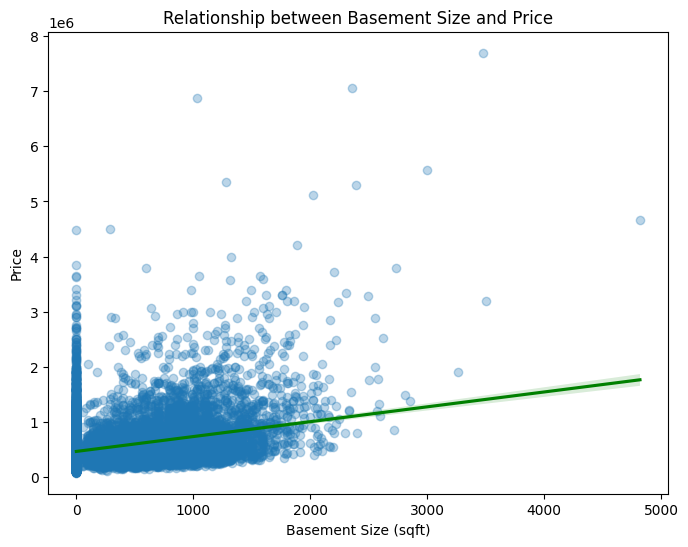

In [16]:
plot_relationship_basement_size(data)

In [17]:
def plot_relationship_grade(data):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='grade', y='price', data=data)
    plt.title('Relationship between Grade and Price')
    plt.xlabel('Grade')
    plt.ylabel('Price')
    plt.show()

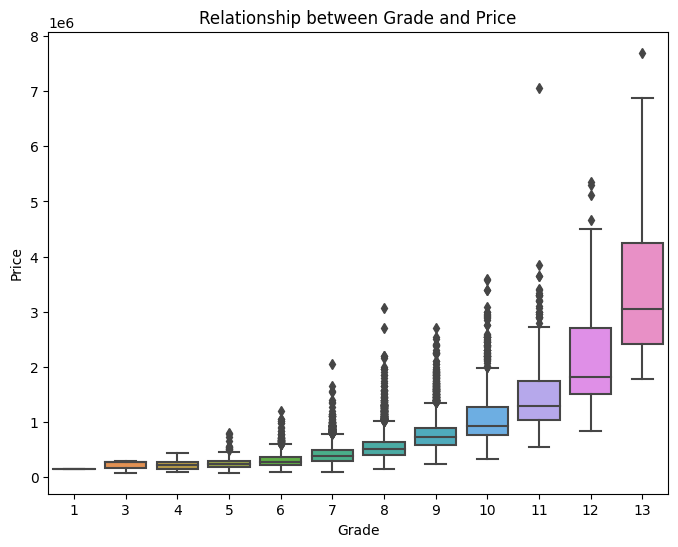

In [18]:
plot_relationship_grade(data)

In [19]:
pip install urllib3==1.26.7

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import folium
from folium.plugins import HeatMap

In [21]:
c = ['price', 'floors', 'sqft_living15', 'sqft_lot15', 'grade']
df = data[c]
df = pd.get_dummies(df, columns=['grade'], drop_first=True)

In [22]:
y = df['price']
X = df.drop('price', axis=1)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [24]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [25]:
print('Coefficients:\n', reg.coef_)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, reg.predict(x_test)))
print('R-square:', reg.score(x_test, y_test))

Coefficients:
 [-1.13943566e+04  1.08046152e+02 -5.12560507e-01 -7.03115817e+03
  9.14067351e+04  1.30468731e+05  1.82189063e+05  2.52040877e+05
  3.53157544e+05  5.35434329e+05  7.91414926e+05  1.16042910e+06
  1.83974240e+06  3.10865026e+06]
Mean Squared Error: 57106338771.04423
R-square: 0.5542108569094004


In [31]:
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [32]:
df_copy = data.copy()
df_copy['count'] = 1

In [33]:
basemap = generateBaseMap()
folium.TileLayer('cartodbpositron').add_to(basemap)
s = folium.FeatureGroup(name='icon').add_to(basemap)

In [34]:
maxpr = data.loc[data['price'].idxmax()]

In [35]:
folium.Marker([maxpr['lat'], maxpr['long']],
              popup='Highest Price: $' + str(format(maxpr['price'], '.0f')),
              icon=folium.Icon(color='green')).add_to(s)

In [36]:
HeatMap(data=df_copy[['lat', 'long', 'count']].groupby(['lat', 'long']).sum().reset_index(),
        radius=8, max_zoom=13, name='Heat Map').add_to(basemap)

In [37]:
folium.LayerControl(collapsed=False).add_to(basemap)

In [38]:
basemap